In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
winequality_red = pd.read_csv('wine+quality/winequality-red.csv', sep=';')

print(winequality_red.shape)
print('--------------------------------------------------------------------------------')
print(winequality_red.columns)

(1599, 12)
--------------------------------------------------------------------------------
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [71]:
# Cálculo de la matriz de correlaciones de la base de datos
winequality_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Debido a que no se presentan correlaciones grandes podemos afirmar que no hay variables redundantes

In [100]:
# Uso 70% para entrenamiento (random split)
train_df= winequality_red.sample(frac=0.7,random_state=200)
rest_df = winequality_red.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

print('Dimensión de train_df: ', train_df.shape)
print('Dimensión de rest_df: ', rest_df.shape)
print('Dimensión de test_df: ', test_df.shape)

Dimensión de train_df:  (1119, 12)
Dimensión de rest_df:  (480, 12)
Dimensión de test_df:  (240, 12)


In [101]:
X_train = train_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']]
Y_train = train_df[['quality']].values

X_val = val_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']]
Y_val = val_df[['quality']].values

X_test = test_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']]
Y_test = test_df[['quality']].values

In [102]:
df_media = pd.DataFrame(X_train.mean()).transpose()
df_std = pd.DataFrame(X_train.std()).transpose()

In [104]:
def normalizar(df, df_media, df_std):
    df_normalizado = df.copy()
    for columna in df.columns:
        media_col = df_media[columna].iloc[0]
        std_col = df_std[columna].iloc[0]
        df_normalizado[columna] = (df[columna] - media_col) / std_col
    return df_normalizado

X_val = normalizar(X_val, df_media, df_std)
X_test = normalizar(X_test, df_media, df_std)

In [105]:
def normalizar_zscore(df):
    df_normalizado = df.copy()
    for columna in df.columns:
        if df[columna].dtype in ['int64', 'float64']:
            media_col = df[columna].mean()
            std_col = df[columna].std()
            df_normalizado[columna] = (df[columna] - media_col) / std_col
    return df_normalizado

X_train = normalizar_zscore(X_train)
X_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
366,2.598672,0.464428,1.981410,2.373042,-0.084201,-0.859167,-0.156458,2.884341,-1.536523,0.449721,-0.375661
1325,-0.955024,-0.398390,-0.164661,-0.598661,-0.219478,0.197536,-0.395307,-1.047880,0.528708,-0.329656,0.184825


In [126]:
def fit_model(X, X_val, X_test, Y, Y_val, Y_test, lr=1e-3, epochs=100):
    """
    Entrena un modelo utilizando el algoritmo de Descenso de Gradiente Estocástico (SGD).

    Parámetros:
    -----------
    X : array-like, shape (n_samples, n_features)
        Las características de entrada del conjunto de datos de entrenamiento.

    Y : array-like, shape (n_samples,)
        Los valores objetivos del conjunto de datos de entrenamiento.

    lr : float, opcional (default=1e-3)
        Tasa de aprendizaje (learning rate) para el algoritmo de SGD.

    epochs : int, opcional (default=100)
        Número de épocas (iteraciones completas sobre el conjunto de datos) para entrenar el modelo.

    Retorna:
    --------
    theta : array, shape (n_features + 1, 1)
        Parámetros del modelo entrenado, incluyendo el término de sesgo.

    Notas:
    ------
    - El algoritmo de SGD se utiliza para ajustar los parámetros del modelo.
    - Se muestra un gráfico con la pérdida en función de las épocas y la evolución de los parámetros del modelo.
    """
    # El conjunto de características X se amplía con una columna de unos para tener en cuenta el término de sesgo.
    X_train_c = np.hstack((np.ones((X.shape[0], 1)), X))
    X_val_c = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
    X_test_c = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    n, m = X_train_c.shape
    # El modelo se inicializa con parámetros theta aleatorios.
    theta = np.random.rand(m, 1)
    # Se registrarán el historial de pérdida y el historial de los parámetros del modelo por cada época
    historical_train_losses = []
    historical_val_losses = []
    historical_test_losses = []
    historical_params = []
    for i in range(epochs):
        # Por cada época recalculamos los valores del vector theta y de la función de perdida
        
        # Definición recursiva de theta reduciendo el error en función de la tasa de aprendizaje
        theta = theta - lr * (np.transpose(X_train_c).dot(X_train_c.dot(theta) - Y)/n)
        # Se calculan los valores estimados en función de los valores de theta
        Y_est_train = X_train_c.dot(theta)
        Y_est_val = X_val_c.dot(theta)
        Y_est_test = X_test_c.dot(theta)
        # Cálculo de la función de perdida en función de los valores estimados y las etiquetas registradas en el vector Y
        loss_train = np.sum(np.power(Y_est_train - Y, 2))/(2 * n)
        loss_val = np.sum(np.power(Y_est_val - Y_val, 2))/(2 * n)
        loss_test = np.sum(np.power(Y_est_test - Y_test, 2))/(2 * n)

        # Almacenamos los cálculos anteriores
        historical_train_losses.append(loss_train)
        historical_val_losses.append(loss_val)
        historical_test_losses.append(loss_test)
        historical_params.append(theta)

    # Se modifica el tipo de dato de la lista de posibles parámetros del modelo a np.array para poder graficar con matplotlib
    historical_params = np.array(historical_params)
    return theta, historical_params, historical_train_losses, historical_val_losses, historical_test_losses

def plot_fit_model(historical_train_losses, historical_val_losses, historical_test_losses):
    t = range(len(historical_train_losses))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('loss', color=color)
    ax1.plot(t, historical_train_losses, color='red', label='Train')
    ax1.plot(t, historical_val_losses, color='green', label='Val')
    ax1.plot(t, historical_test_losses, color='blue', label='Test')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')  # Mostrar leyenda en el ax1

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

/home/usuario/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_12517/3618338736.py:53: RuntimeWarning: overflow encountered in power
  loss_test = np.sum(np.power(Y_est_test - Y_test, 2))/(2 * n)
/tmp/ipykernel_12517/3618338736.py:51: RuntimeWarning: overflow encountered in power
  loss_train = np.sum(np.power(Y_est_train - Y, 2))/(2 * n)
/tmp/ipykernel_12517/3618338736.py:52: RuntimeWarning: overflow encountered in power
  loss_val = np.sum(np.power(Y_est_val - Y_val, 2))/(2 * n)


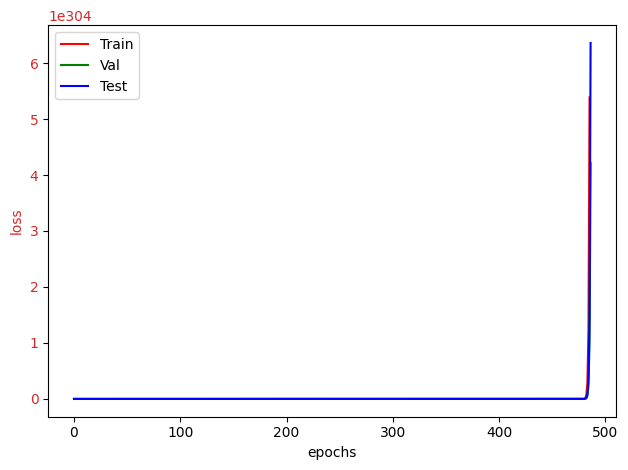

In [129]:
theta, historical_params, historical_train_losses, historical_val_losses, historical_test_losses = fit_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1, epochs=1000)
plot_fit_model(historical_train_losses, historical_val_losses, historical_test_losses)

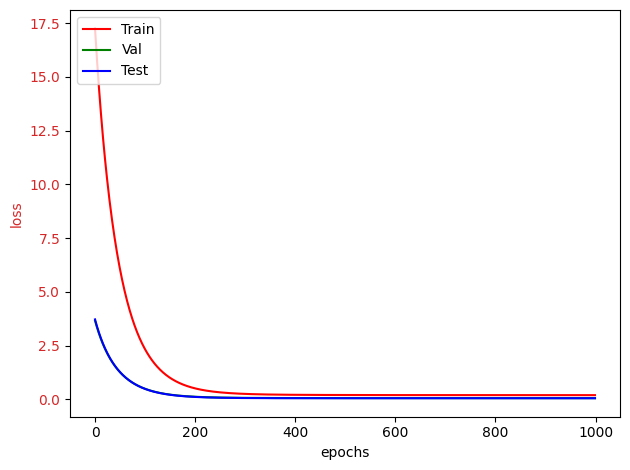

In [130]:
theta, historical_params, historical_train_losses, historical_val_losses, historical_test_losses = fit_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-2, epochs=1000)
plot_fit_model(historical_train_losses, historical_val_losses, historical_test_losses)

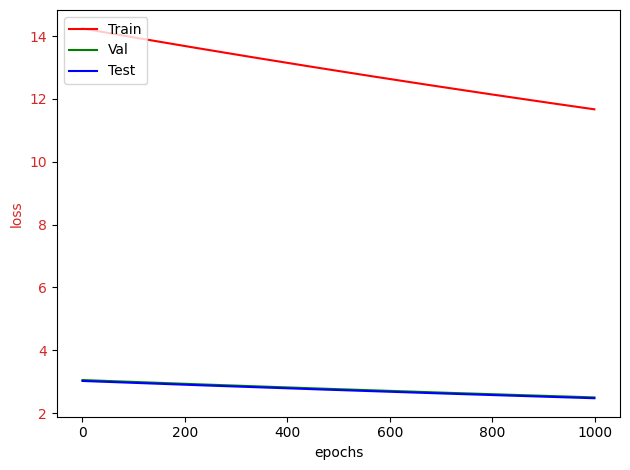

In [131]:
theta, historical_params, historical_train_losses, historical_val_losses, historical_test_losses = fit_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-4, epochs=1000)
plot_fit_model(historical_train_losses, historical_val_losses, historical_test_losses)

In [ ]:
# Regularización (L2, L1, otro)
# Implementación de la función logística
# Regularización (L2, L1, otro) - Logistica